# Labeling the Data:

In [ ]:
#Instructions

# With this Jupyter notebook should also have been included an excel file named Final Data.xlsx.
# Place the Jupyter notebook and excel file in the same folder space to begin 

# This code is designed to be run as is with no changes to any values. Key parameters will be identified throughout
# in case the user would like to experiment with different values

#Import excel with air conditioner feature data
#Where is the excel sheet supposed to live?
import pandas as pd
df = pd.read_excel ('Final Data.xlsx')
skipinitialspace=True

In [ ]:
# This module labels the faults in the data by flagging a fault everytime one of the constarints is violated.
# The following constraints are applied on the following columns in the data: FI.REF.A, FI.REF.B, FI.COND, FI.EVAP
# Constraints were taken from lab and used to label the data since this is a supervised learning method
# A single if statement is used so only a single fault is checked for at a given time
# Each section of the if statement is labeled for its respective fault
# temp4 was applied to all the data points.
def temp4(row):
    # Undercharged A Fault
    if row['FI.REF.A'] < -0.2:
        row['LABELS'] = 'Undercharged A'
        
    # Overcharged A    
    elif row['FI.REF.A'] > 0.2:
        row['LABELS'] = 'Overcharged A'
        
    # System Off
    elif row['COMP.A'] == 0 or row['COMP.B'] == 0 or row['System Status'] == 0:
        row['LABELS'] = 'System Off'
        
    # Undercharged B    
    elif row['FI.REF.B'] < -0.2:
        row['LABELS'] = 'Undercharged B'
        
    # Overcharged B   
    elif row['FI.REF.B'] > 0.2:
        row['LABELS'] = 'Overcharged B'
        
    # For Condensor faults
    elif row['FI.COND'] < -0.4:
        row['LABELS'] = 'Condensor Fault' # fault
        
    # For Evaporator faults  
    elif row['FI.EVAP'] < -0.305:
        row['LABELS'] = 'Evaporator Fault'
        
    else:
        # No Fault
        row['LABELS'] = 'No Fault'
        
    return row

df_classesD = df.apply(temp4, axis=1)

In [ ]:
# create excel writer object and output final labeled dataset
writer = pd.ExcelWriter('Final(With Label) Data.xlsx')

# write dataframe to excel
df_classesD.to_excel(writer)

# save the excel
writer.save()

print('DataFrame is written successfully to Excel File.')

In [ ]:
# Proceed when output above states "DataFrame is written successfully to Excel File."
# Print table of total count of each type of data after labeling complete
df_classesD['LABELS'].value_counts()

# Applying SVM to Data:

In [1]:
# import final labeled dataset
import pandas as pd
df = pd.read_excel ('Final(With Label) Data.xlsx')
skipinitialspace=True

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

# We are going to run SVM on all faults
# df.drop chooses to use all data in excel file excluding the column with the labels
x = df.iloc[:, 4:32]
y = df['LABELS']

In [3]:
from sklearn import svm

# Create a svm Classifier, initially we are not going to hypertune the parameters, 
# we are going with the default SVM hyperparameters
clf = svm.SVC(kernel='linear')# Linear Kernel

In [4]:
# Apply SVM and implement 10 Fold cross fold validation.   
cv = KFold(n_splits = 10, random_state=1, shuffle=True)
# create a linear SVM model and set hyperparameters C and gamma. Modify these parameters to tune the SVM model
model = svm.SVC(kernel='linear')
# evaluate model and report performance
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f Mean Standard Deviation(%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.982 Mean Standard Deviation(0.007)


# Apply Confusion Matrix to Cross Validation Model:

In [5]:
# Fault names for confusion matrix
# System not working means system is off, so System Not Working, and System Off represent the same class
class_names = ['Undercharged B','System Off', 'Overcharged A', 'Condensor Fault', 'Evaporator Fault', 'No Fault']

Text(32.99999999999999, 0.5, 'True')

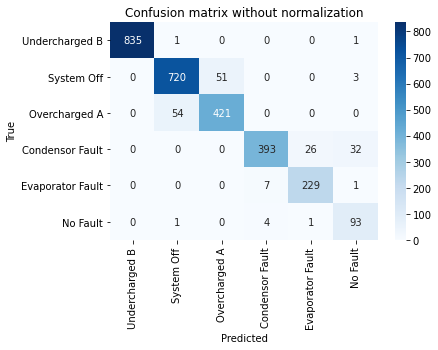

In [6]:
# This module creates a confusion matrix for all the faults
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Confusion matrix compares y_test (y) to y_pred
y_pred = cross_val_predict(clf, x, y, cv = 10)
conf_mat = confusion_matrix(y, y_pred, labels = class_names)
index = class_names
columns = class_names
cm_df = pd.DataFrame(conf_mat,columns,index)                        
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt= "d")
plt.title('Confusion matrix without normalization')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(32.99999999999999, 0.5, 'True')

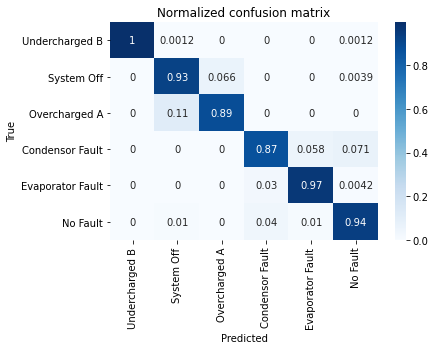

In [7]:
# Create new confusion matrix with normalization applied
y_pred = cross_val_predict(clf, x, y, cv = 10)
conf_mat2 = confusion_matrix(y, y_pred, labels = class_names, normalize='true')
cm_df2 = pd.DataFrame(conf_mat2,columns,index)                        
sns.heatmap(cm_df2, annot=True, cmap="Blues")
plt.title('Normalized confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

## Accuracy Metrics:

In [8]:
# Generate accuracy metrics for SVM model
from sklearn.metrics import classification_report
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
# The recall is intuitively the ability of the classifier to find all the positive samples.
# The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, 
# where an F-beta score reaches its best value at 1 and worst score at 0.
# The support is the number of occurrences of each class where prediction is true
target_names = ['Condensor Fault', 'Evaporator Fault', 'No Fault', 'Overcharged A', 'System Off', 'Undercharged B']
print(classification_report(y, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

 Condensor Fault       0.97      0.87      0.92       451
Evaporator Fault       0.89      0.97      0.93       237
        No Fault       0.72      0.94      0.81        99
   Overcharged A       0.89      0.89      0.89       475
      System Off       0.93      0.93      0.93       774
  Undercharged B       1.00      1.00      1.00       837

        accuracy                           0.94      2873
       macro avg       0.90      0.93      0.91      2873
    weighted avg       0.94      0.94      0.94      2873



# Using Pearson Correlation, and Trying Top n Correlated Features in SVM:

In [9]:
# upload dataset and shuffle it for randomization 
df = pd.read_excel ('Final(With Label) Data.xlsx').sample(frac = 1, random_state= 10,).reset_index(drop=True)
skipinitialspace=True

In [10]:
# Combining colums 4:32 with column 37 (containing the labels), to use pearson correlation between the lables 
# and the rest of the featues.
# We will only use 90% of the data which is the training data, for feature selection to determine the optimal
# of features.
# Shuffling was done to imitate cross fold validation scheme (it shuffles and splits into test/training)
df1 = df.iloc[:,4:32].join(df.iloc[:,43])
df2 = df1[0:2586]
# randomizing features and returning 80% of them (training set size)
# Appling Pearson Correlation
corr_matrix = df2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# Sorting highest correlated features
corr_matrix['LABELS'][0:2586].sort_values(ascending=False)
# Putting the Correlated features and their pearson correlation in a dictionary 
dic = corr_matrix['LABELS'][0:2586].sort_values(ascending=False).to_dict()
corr_list = list(dic.items())

In [11]:
# Reversing the order of the correlated features from highest to lowest value
corr_list.sort(key = lambda x : x[1], reverse = True)

In [12]:
# List of correlated features and their correlation values (*100 --> %)
# Correlation value in relation to output "LABELS"
corr_list

[('LABELS', 1.0),
 ('SUCT1', 0.08004260843204708),
 ('EVAT', 0.0600678941518058),
 ('DIST1', 0.018378879420725334),
 ('SURH', 0.015910315660396704),
 ('RERH', 0.013932004450557376),
 ('ECT', 0.013890408340240473),
 ('ECT.Humidity', 0.013760361820781195),
 ('ECRH', 0.013573348611116146),
 ('SUAVG.Humidity', 0.013573348611116146),
 ('ORH', 0.013573348611116146),
 ('OT', 0.013573348611116146),
 ('IT', 0.013141377566961283),
 ('SUCP2', 0.013054324015699654),
 ('RUAVG.Humidity', 0.012987634880344096),
 ('RET', 0.012969747110828414),
 ('SUCP1', 0.012349351553054161),
 ('SUT', 0.011890163210849772),
 ('DISP2', 0.01147211225235575),
 ('DISP1', 0.009503042320288426),
 ('FLW', -0.0007278027156180084),
 ('SUCT2', -0.003346137454932927),
 ('CONT', -0.004647344797409041),
 ('EXT1', -0.021361403902296915),
 ('DIST2', -0.032627983089972896),
 ('EXT2', -0.038808196852072735),
 ('SUAVG', -0.06697627936534291),
 ('RUAVG', -0.12184514000710306),
 ('MAIN', -0.4126883787479898)]

# Applying SVM on model with feature selection:

In [19]:
# For loop to run through the best n correlated features and apply to SVM to see if their is an accuracy increase
# Best accuracy achieved when top 25 features are chosen
# This method is used instead of forward/backward selection due to computational complexity of the selection methods
# Starting from 9 features, otherwis SVM will not be able to classify, or will calssify with a very low accuracy
for n in range(10,30):
    column_names = [i[0] for i in corr_list[1:n] ]

    # Now we apply the feature selection method on the whole data
    df = pd.read_excel ('Final(With Label) Data.xlsx')
    skipinitialspace=True
    
    df_sub = df.loc[:,column_names]
    X = df_sub
    y = df['LABELS']

    # Applying SVM and Implement 10 Fold cross fold validation. 
    # To change the number of folds, chnage the n_splits value  
    cv = KFold(n_splits = 10, random_state=1, shuffle=True)
    # create a linear SVM model and set hyperparameters C and gamma. Modify these parameters to tune the SVM model
    model = svm.SVC(kernel='linear')
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Mean Accuracy: %.3f Mean Standard Deviation(%.3f); using top %d Feature(s)' % (mean(scores), std(scores), n-1))

Mean Accuracy: 0.931 Mean Standard Deviation(0.015); using top 9 Feature(s)
Mean Accuracy: 0.930 Mean Standard Deviation(0.015); using top 10 Feature(s)
Mean Accuracy: 0.975 Mean Standard Deviation(0.010); using top 11 Feature(s)
Mean Accuracy: 0.975 Mean Standard Deviation(0.010); using top 12 Feature(s)
Mean Accuracy: 0.977 Mean Standard Deviation(0.011); using top 13 Feature(s)
Mean Accuracy: 0.977 Mean Standard Deviation(0.011); using top 14 Feature(s)
Mean Accuracy: 0.976 Mean Standard Deviation(0.011); using top 15 Feature(s)
Mean Accuracy: 0.976 Mean Standard Deviation(0.011); using top 16 Feature(s)
Mean Accuracy: 0.978 Mean Standard Deviation(0.009); using top 17 Feature(s)
Mean Accuracy: 0.979 Mean Standard Deviation(0.008); using top 18 Feature(s)
Mean Accuracy: 0.981 Mean Standard Deviation(0.008); using top 19 Feature(s)
Mean Accuracy: 0.982 Mean Standard Deviation(0.009); using top 20 Feature(s)
Mean Accuracy: 0.983 Mean Standard Deviation(0.008); using top 21 Feature(s)


#### Top 25 (25/28) features --> 98.9% accuracy
#### Accuracy improved from original model by 0.7%

# Tuning Hyperparameters on Model with Feature Selection:

In [20]:
# Make a susbset of features only using the top 25 correlated features with the output
# Return new dimensions of the dataset
column_names = [i[0] for i in corr_list[1:26]] 
df_sub_new = df.loc[:,column_names]
len(column_names)

25

In [21]:
# Return new dimensions of the dataset
X_new = df_sub_new
y = df['LABELS']
X_new.shape 

(2873, 25)

## Hyper Tuning C parameter:

In [ ]:
list_C = [0.001, 0.10, 1, 5, 10, 25, 50, 100]

In [ ]:
# Iterate through C values to see which C value gives the best accuracy:
for i in list_C:
    # Applying SVM and Implement 10 Fold cross fold validation. 
    # To change the number of folds, change the n_splits value  
    cv = KFold(n_splits = 10, random_state=10, shuffle=True)
    # create a linear SVM model and set hyperparameters C and gamma. Modify these parameters to tune the SVM model
    model = svm.SVC(kernel='linear', C = i, gamma='scale')
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Mean Accuracy: %.3f Mean Standard Deviation(%.3f); For the value C = %.3f' % (mean(scores), std(scores), i))

#### C = 1 gives best result, we can't determine exactly which value for C the SVM module is using but we can surmize it is close to 1

## Hypertuning for the value of Gamma, using C = 1:

In [ ]:
list_Gamma =  [1,0.1,0.01,0.001]

In [ ]:
# Iterate through Gamma values to see which Gamma value gives the best accuracy:
for i in list_C:
    # Applying SVM and Implement 10 Fold cross fold validation. 
    # To change the number of folds, chnage the n_splits value  
    cv = KFold(n_splits = 10, random_state=1, shuffle=True)
    # create a linear SVM model and set hyperparameters C and gamma. Modify these parameters to tune the SVM model
    model = svm.SVC(kernel='linear', C = 0.1, gamma = i)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Mean Accuracy: %.3f Mean Standard Deviation(%.3f); For the value Gamma = %.3f' % (mean(scores), std(scores), i))

#### Gamma has no affect on the SVM model, so we will go back to gamma = 'scale' as default

# Applying Confusion Matrix to SVM model with Feature Selection (and tuned Hyperparameters):

In [22]:
# Fault names for confusion matrix
class_names = ['Undercharged B','System Off', 'Overcharged A', 'Condensor Fault', 'Evaporator Fault', 'No Fault']

Text(32.99999999999999, 0.5, 'True')

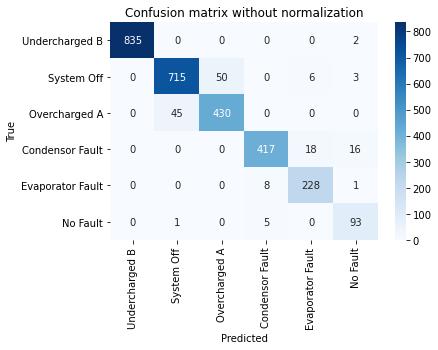

In [23]:
# create a linear SVM model and set hyperparameters C and gamma. Modify these parameters to tune the SVM model
clf = svm.SVC(kernel='linear', gamma='scale')# Linear Kernel

y_pred = cross_val_predict(clf, X_new, y, cv = 10)
# Create a confusion matrix by comparing y_test to y_predict labels
conf_mat = confusion_matrix(y, y_pred, labels = class_names)
index = class_names
columns = class_names
cm_df = pd.DataFrame(conf_mat,columns,index)                        
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt= "d")
plt.title('Confusion matrix without normalization')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(32.99999999999999, 0.5, 'True')

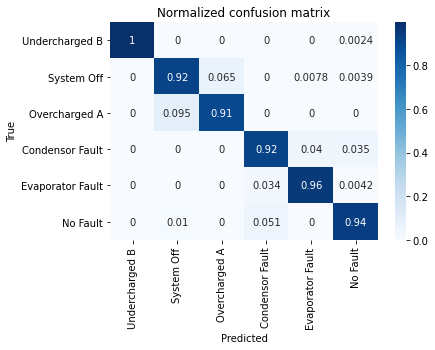

In [24]:
y_pred = cross_val_predict(clf, X_new, y, cv = 10)
# Create new confusion matrix with normalization applied
conf_mat2 = confusion_matrix(y, y_pred, labels = class_names, normalize='true')
cm_df2 = pd.DataFrame(conf_mat2,columns,index)                        
sns.heatmap(cm_df2, annot=True, cmap="Blues")
plt.title('Normalized confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

## Accuracy Metrics:

In [25]:
# Label Names
target_names = ['Condensor Fault', 'Evaporator Fault', 'No Fault', 'Overcharged A', 'System Off', 'Undercharged B']
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
# The recall is intuitively the ability of the classifier to find all the positive samples.
# The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, 
# where an F-beta score reaches its best value at 1 and worst score at 0.
# The support is the number of occurrences of each class where prediction is true
print(classification_report(y, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

 Condensor Fault       0.97      0.92      0.95       451
Evaporator Fault       0.90      0.96      0.93       237
        No Fault       0.81      0.94      0.87        99
   Overcharged A       0.90      0.91      0.90       475
      System Off       0.94      0.92      0.93       774
  Undercharged B       1.00      1.00      1.00       837

        accuracy                           0.95      2873
       macro avg       0.92      0.94      0.93      2873
    weighted avg       0.95      0.95      0.95      2873

